In [3]:
import tools
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

(180.0, 420.0)

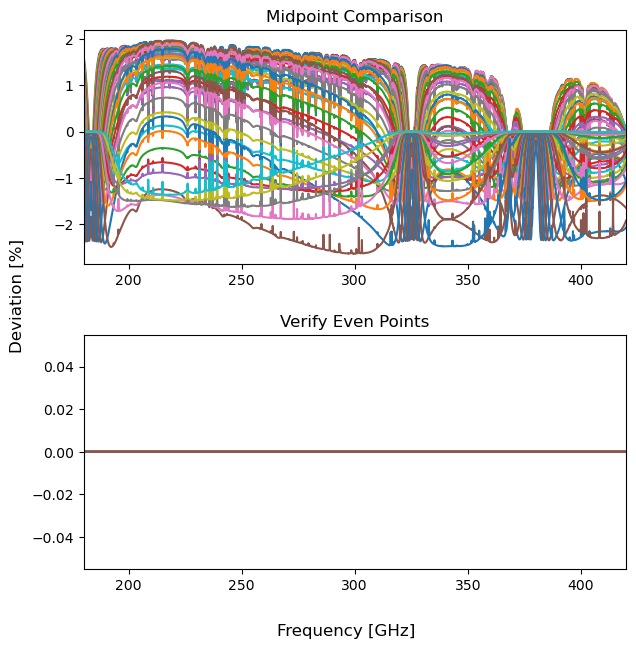

In [6]:
min_nscale = -1
max_nscale = 1
Nscale_points = 21
Nscale_map = np.linspace(min_nscale, max_nscale, Nscale_points)

ZA_points = 11
min_airmass = 1.001
max_airmass = 4.001
airmass_map = np.linspace(min_airmass, max_airmass, ZA_points)
# ZA_map scaling with linear air_mass
ZA_map = tools.calc_zenith(airmass_map)

freq_points = 240001
Tb_scalar_field = np.zeros((Nscale_points, ZA_points, freq_points))

Tb_scalar_field = np.zeros((Nscale_points, ZA_points, freq_points))
Nscale_jacobian = np.zeros((Nscale_points, ZA_points, freq_points))
za_jacobian = np.zeros((Nscale_points, ZA_points, freq_points))
airmass_jacobian = np.zeros((Nscale_points, ZA_points, freq_points))

data_path = '/Users/namsonnguyen/repo/AM_Data/MaunaKea_SON50/Nscale21_AirMass11/'

# Load data
for idx, Nscale in enumerate(Nscale_map):
    for jdx, airmass in enumerate(airmass_map):

        filename = f'MaunaKea_Tb_Spectrum_{airmass:.3f}_{Nscale:.2f}'
        data = np.load(f'{data_path}{filename}.out')

        freq_map = data[:,0]
        
        # Second column is Tb in K
        Tb_scalar_field[idx,jdx] = data[:,2]

        # Jacobian
        Nscale_jacobian[idx,jdx] = data[:,4] * (np.log(10) * (10 ** Nscale))
        za_jacobian[idx, jdx] = data[:,3]
        airmass_jacobian[idx,jdx] = za_jacobian[idx, jdx] / (airmass * np.sqrt((airmass**2) - 1))

# Pass freq in points
interp_func = RegularGridInterpolator(
    points=(Nscale_map[::2], airmass_map[::2], freq_map), 
    values=Tb_scalar_field[::2,::2], method="linear"
)

x,y,z = np.meshgrid(Nscale_map, airmass_map, freq_map, indexing='ij')

# Must be fed one-dim
eval_grid = interp_func((x.flatten(),y.flatten(),z.flatten())).reshape(x.shape)
comparison_grid = ((eval_grid - Tb_scalar_field) / Tb_scalar_field) * 100

# Plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

freq_channels = np.linspace(180, 420, freq_points)
for idx in range(1, Nscale_points, 2):
    for jdx in range(1, ZA_points, 2):
        ax1.plot(freq_channels, comparison_grid[idx,jdx])

fig.supylabel("Deviation [%]")
fig.supxlabel("Frequency [GHz]")

ax1.set_title("Midpoint Comparison")
ax1.set_xlim(180,420)

freq_channels = np.linspace(180, 420, freq_points)
for idx in range(0, Nscale_points, 2):
    for jdx in range(0, ZA_points, 2):
        ax2.plot(freq_channels, comparison_grid[idx,jdx])

ax2.set_title("Verify Even Points")
ax2.set_xlim(180,420)

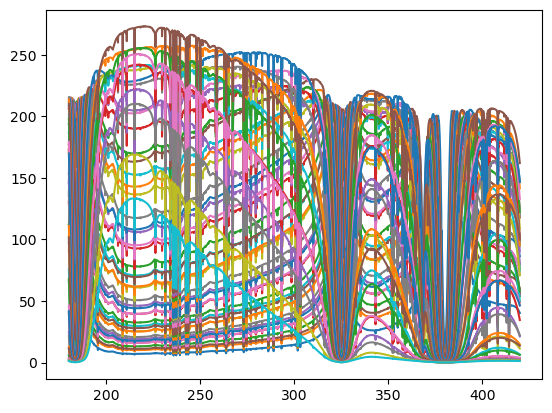

In [8]:
interp_func = RegularGridInterpolator(
    points=(Nscale_map[::2], airmass_map[::2], freq_map), 
    values=Nscale_jacobian[::2,::2], method="linear"
)

x,y,z = np.meshgrid(Nscale_map, airmass_map, freq_map, indexing='ij')

# Must be fed one-dim
eval_grid = interp_func((x.flatten(),y.flatten(),z.flatten())).reshape(x.shape)

freq_channels = np.linspace(180, 420, freq_points)
for idx in range(1, Nscale_points, 2):
    for jdx in range(1, ZA_points, 2):
        plt.plot(freq_channels, eval_grid[idx,jdx])

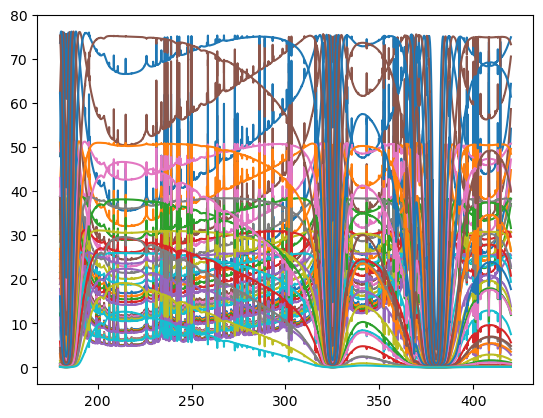

In [9]:
interp_func = RegularGridInterpolator(
    points=(Nscale_map[::2], airmass_map[::2], freq_map), 
    values=airmass_jacobian[::2,::2], method="linear"
)

x,y,z = np.meshgrid(Nscale_map, airmass_map, freq_map, indexing='ij')

# Must be fed one-dim
eval_grid = interp_func((x.flatten(),y.flatten(),z.flatten())).reshape(x.shape)

freq_channels = np.linspace(180, 420, freq_points)
for idx in range(1, Nscale_points, 2):
    for jdx in range(1, ZA_points, 2):
        plt.plot(freq_channels, eval_grid[idx,jdx])